In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
df_fea = pd.read_csv('data/feature_scaled.csv')

In [6]:
df_fea.head()

,Product ID,Height (cm),Width (cm),Depth (cm),Avg Daily Demand,Product Category,Product_Label
0,P20106,0.504858,0.440043,0.621134,0.260515,Electronics,1
1,P41070,0.406844,0.475814,0.828835,0.085344,Electronics,1
2,P29033,0.404432,0.313909,0.340179,0.091396,Food,2
3,P47714,0.331724,0.472225,0.495633,0.034310,Clothing,0
4,P14692,0.136881,0.466322,0.684951,0.083450,Food,2


In [8]:
wcss = []
X = df_fea[['Height (cm)', 'Width (cm)', 'Depth (cm)', 'Avg Daily Demand','Product_Label']]

In [9]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

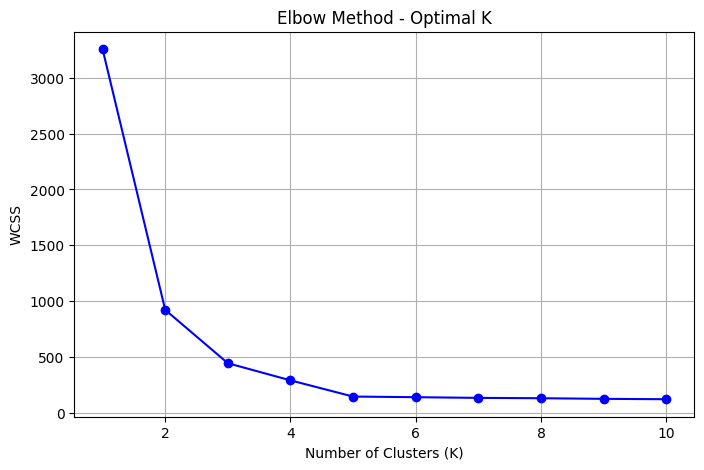

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method - Optimal K')
plt.grid(True)

#plt.axvline(x=3, color='r', linestyle='--')
#plt.legend()

plt.show()

In [26]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df_fea['Cluster'] = kmeans.fit_predict(X)


In [27]:
df_fea.to_csv("data/clustered_products.csv", index=False)



# Dimenation Reduction

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

In [30]:
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df_fea['Cluster']

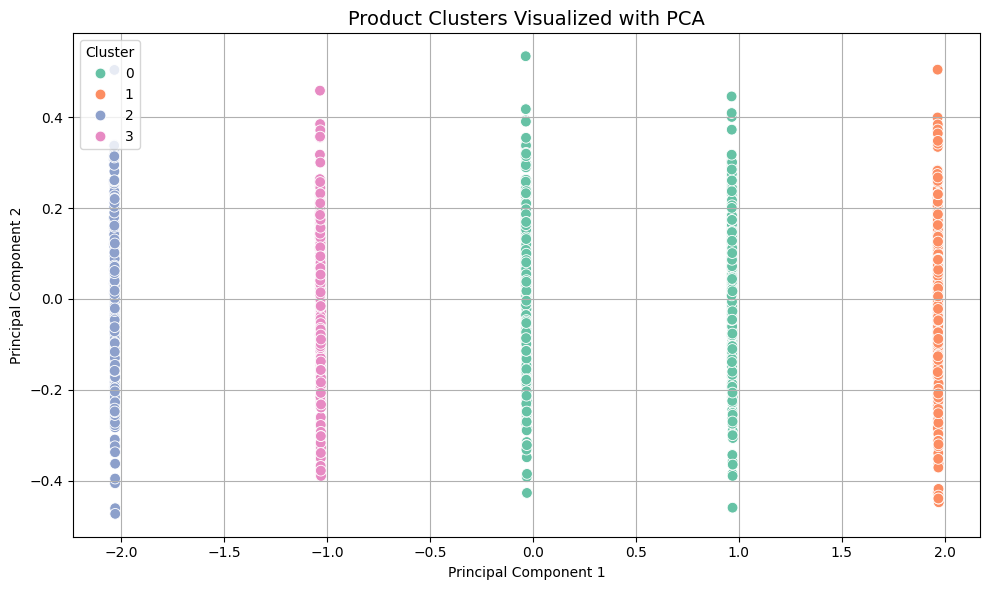

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.title('Product Clusters Visualized with PCA', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# Cluster Profiling:

In [32]:
cluster_profile= df_fea.groupby('Cluster')[
    ['Height (cm)', 'Width (cm)', 'Depth (cm)', 'Avg Daily Demand']
].mean().round(2)  # Group by Cluster and calculate mean for key features

In [33]:
cluster_profile['Product Count'] = df_fea['Cluster'].value_counts().sort_index()

In [34]:
cluster_profile

,Height (cm),Width (cm),Depth (cm),Avg Daily Demand,Product Count
Cluster,,,,,
0,0.44,0.39,0.45,0.27,581
1,0.43,0.39,0.44,0.27,331
2,0.45,0.37,0.47,0.27,307
3,0.44,0.40,0.46,0.27,281
